In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# hyperparameters tuning
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# XGBoost
from xgboost import XGBClassifier

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [5]:
train.shape

(614, 13)

In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Univariate Analysis

In [6]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [14]:
train['LoanAmount']

0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

### Cateogorical Variables (Nominal)

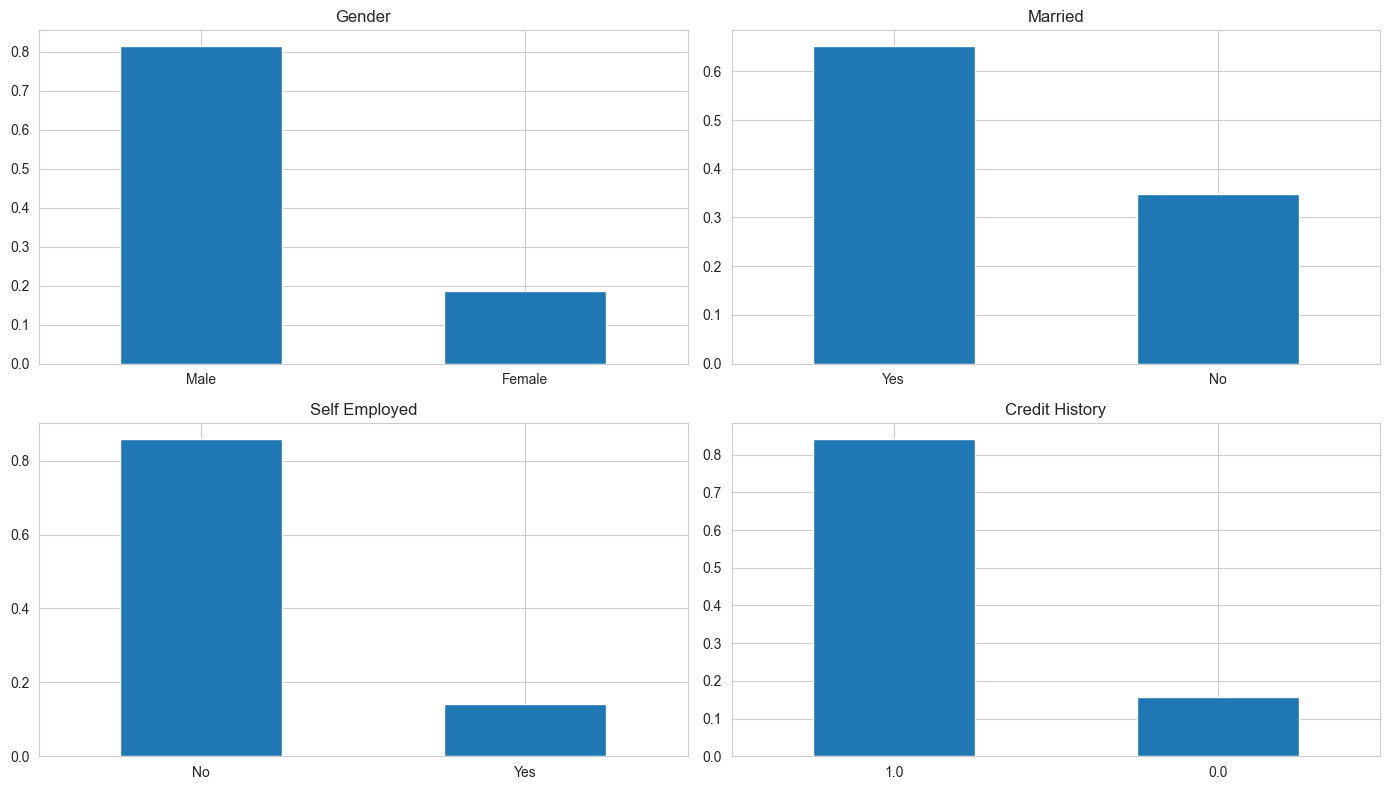

In [12]:
plt.figure(1, layout='tight')
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot(kind='bar', figsize=(14, 8), title="Gender", rot=0)

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot(kind='bar', figsize=(14, 8), title="Married", rot=0)

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot(kind='bar', figsize=(14, 8), title='Self Employed', rot=0)

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot(kind='bar', figsize=(14, 8), title='Credit History', rot=0)
plt.show()

### Inference:
Categorical variables are pretty imbalanced based on the above charts

### Ordinal variable

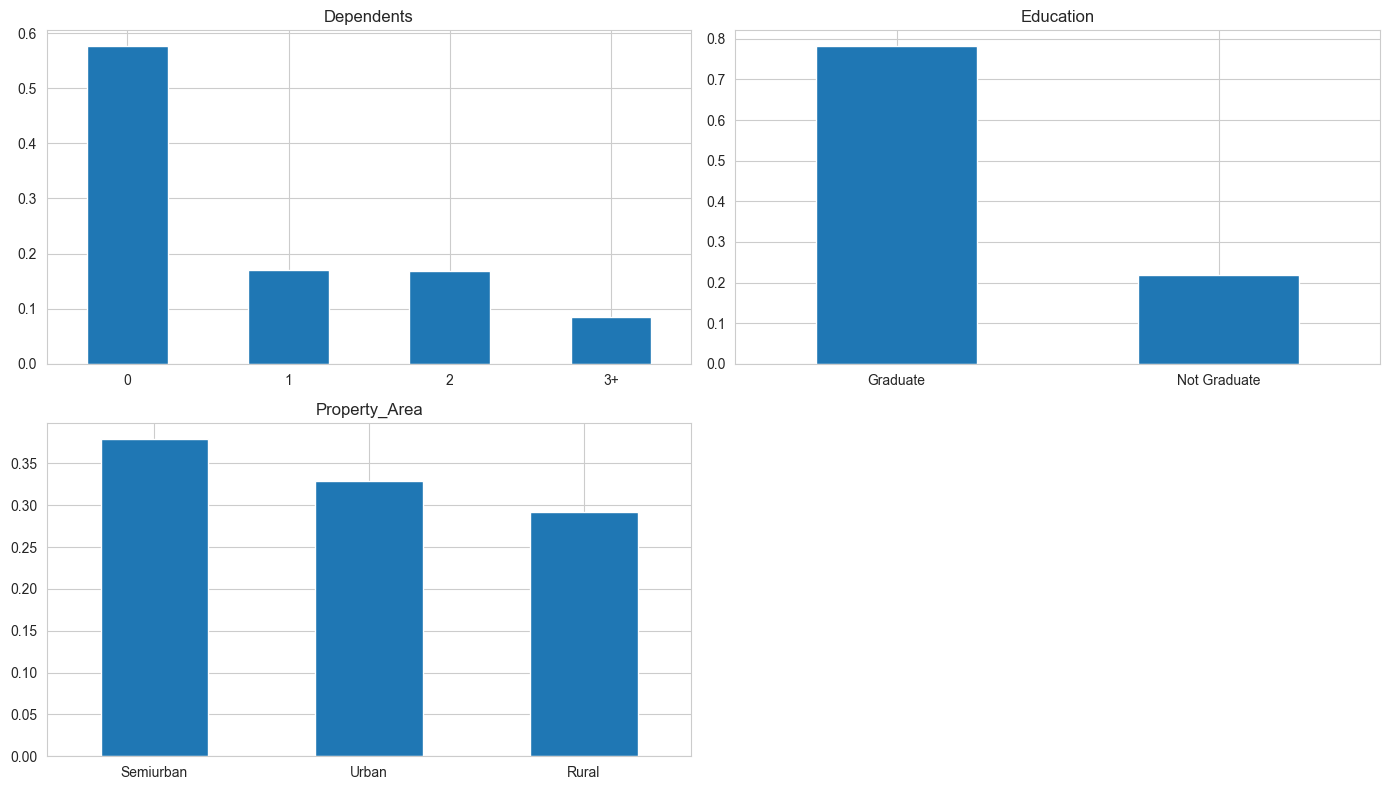

In [14]:
plt.figure(1, layout='tight')
plt.subplot(221)
train['Dependents'].value_counts(normalize=True).plot(kind='bar', figsize=(14, 8), title='Dependents', rot=0)

plt.subplot(222)
train['Education'].value_counts(normalize=True).plot(kind='bar', figsize=(14, 8), title='Education', rot=0)

plt.subplot(223)
train['Property_Area'].value_counts(normalize=True).plot(kind='bar', figsize=(14, 8), title='Property_Area', rot=0)

plt.show()

### Numerical variable

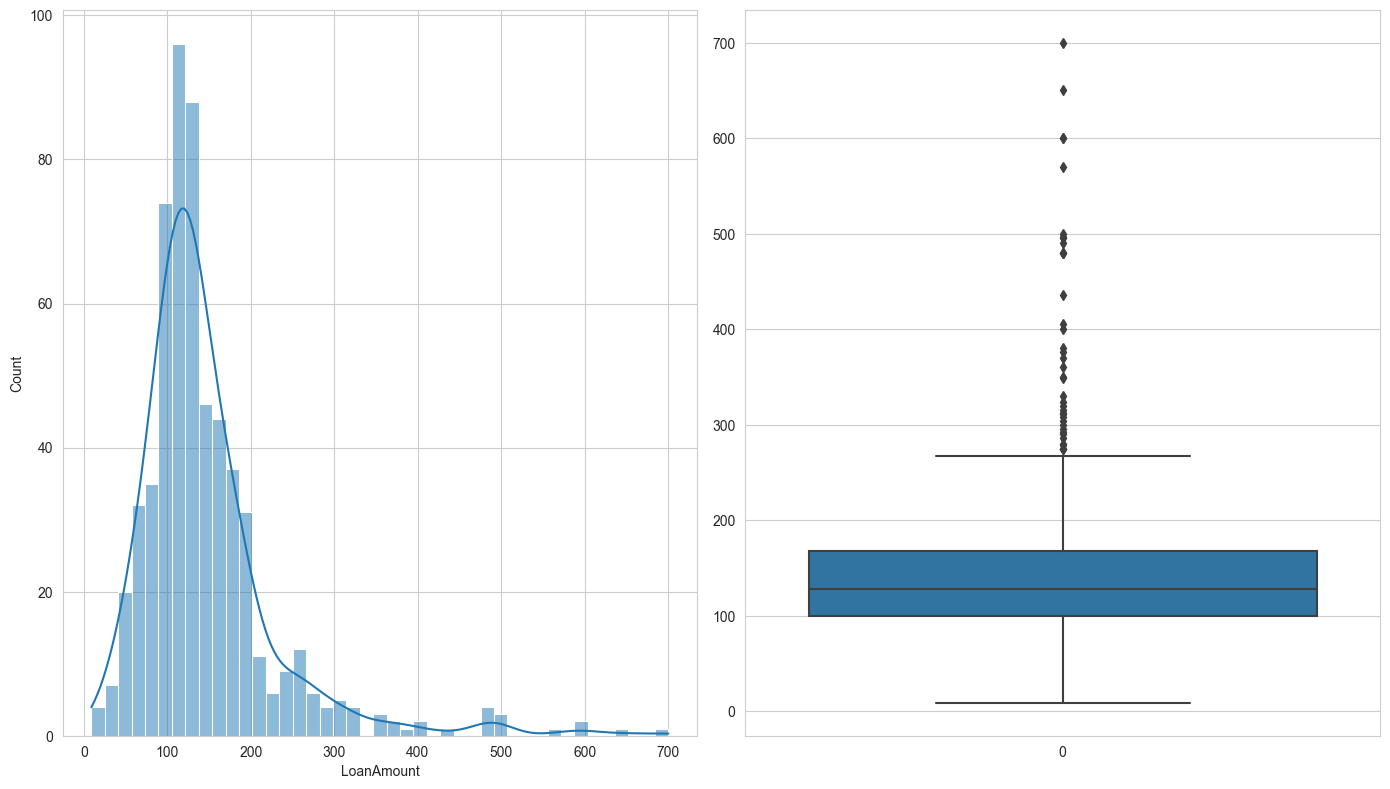

In [39]:
plt.figure(1, layout='tight', figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.histplot(train['LoanAmount'], kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(train['LoanAmount'])
plt.show()

### Bivariate Analysis

In [40]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [103]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender = Gender.div(Gender.sum(1).astype('float32'), axis=0)

Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married = Married.div(Married.sum(1).astype('float32'), axis=0)

Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents = Dependents.div(Dependents.sum(1).astype('float32'), axis=0)

Education = pd.crosstab(train['Education'], train['Loan_Status'])
Education = Education.div(Education.sum(1).astype('float32'), axis=0)

Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed = Self_Employed.div(Self_Employed.sum(1).astype('float32'), axis=0)

Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History = Credit_History.div(Credit_History.sum(1).astype('float32'), axis=0)

Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area = Property_Area.div(Property_Area.sum(1).astype('float32'), axis=0)

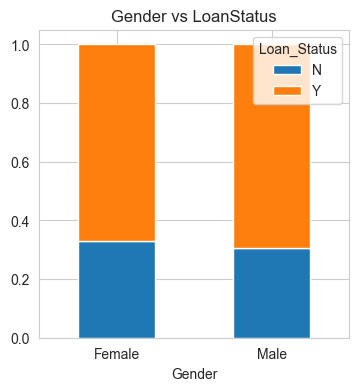

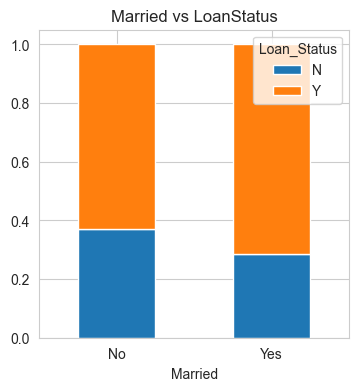

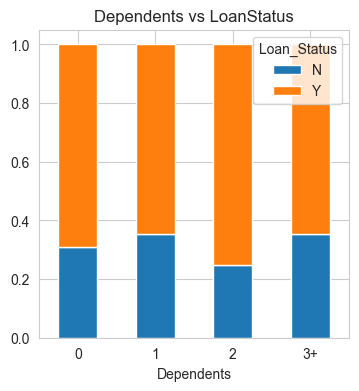

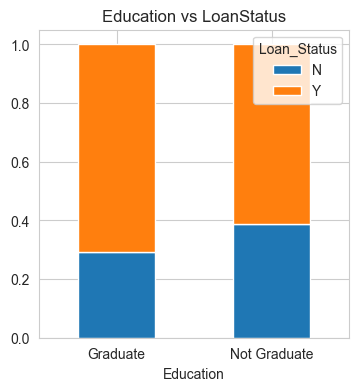

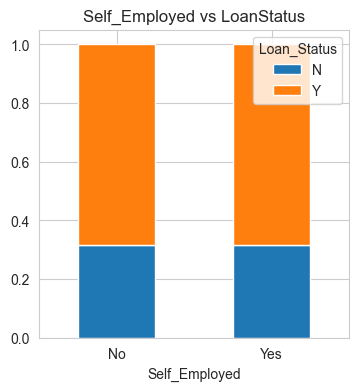

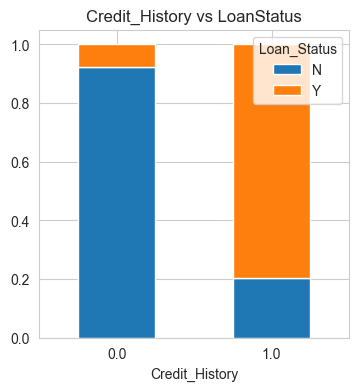

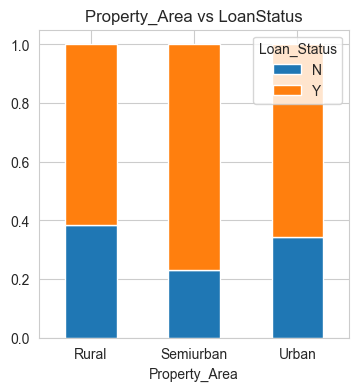

In [104]:
Gender.plot(kind='bar', figsize=(4, 4), stacked=True, title="Gender vs LoanStatus", rot=0)

Married.plot(kind='bar', figsize=(4, 4), stacked=True, title="Married vs LoanStatus", rot=0)

Dependents.plot(kind='bar', figsize=(4, 4), stacked=True, title="Dependents vs LoanStatus", rot=0)

Education.plot(kind='bar', figsize=(4, 4), stacked=True, title="Education vs LoanStatus", rot=0)

Self_Employed.plot(kind='bar', figsize=(4, 4), stacked=True, title="Self_Employed vs LoanStatus", rot=0)

Credit_History.plot(kind='bar', figsize=(4, 4), stacked=True, title="Credit_History vs LoanStatus", rot=0)

Property_Area.plot(kind='bar', figsize=(4, 4), stacked=True, title="Property_Area vs LoanStatus", rot=0)

plt.show()

In [108]:
train['ApplicantIncome'].quantile(q=[0, 0.25, 0.5, 0.75])

0.00     150.0
0.25    2877.5
0.50    3812.5
0.75    5795.0
Name: ApplicantIncome, dtype: float64

In [112]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train['Income_Bin'] = pd.cut(train['ApplicantIncome'], bins=bins, labels=group)

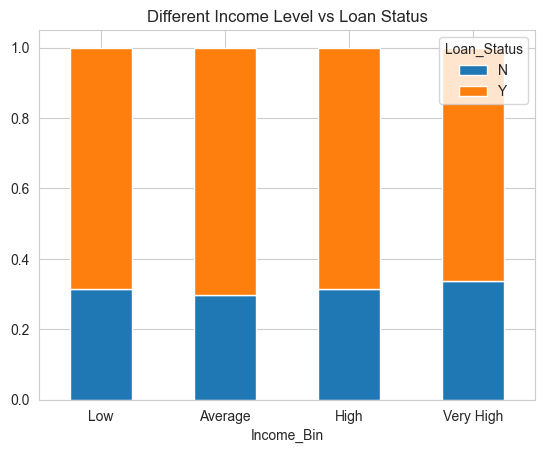

In [115]:
Income_Bin = pd.crosstab(train['Income_Bin'], train['Loan_Status'])
Income_Bin.div(Income_Bin.sum(1), axis=0).plot.bar(stacked=True, title="Different Income Level vs Loan Status", rot=0)
plt.show()

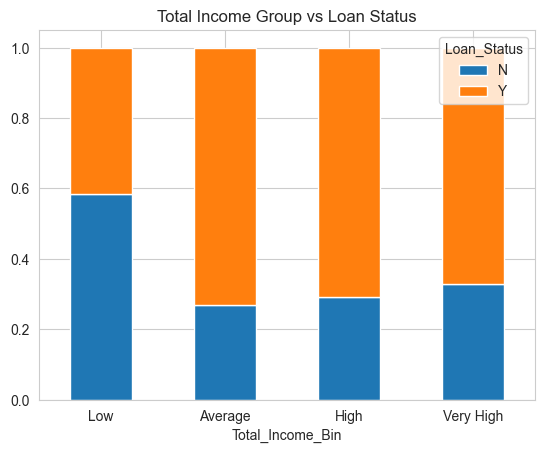

In [117]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']

train['Total_Income_Bin'] = pd.cut(train['Total_Income'], bins=bins, labels=group)
Total_Income_Bin = pd.crosstab(train['Total_Income_Bin'], train['Loan_Status'])
Total_Income_Bin.div(Total_Income_Bin.sum(1), axis=0).plot.bar(stacked=True, title="Total Income Group vs Loan Status", rot=0)
plt.show()

In [119]:
train = train.drop(['Income_Bin', 'Total_Income_Bin', 'Total_Income'], axis=1)

In [120]:
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)

train['Loan_Status'].replace({ 'Y': 1, 'N': 0 }, inplace=True)

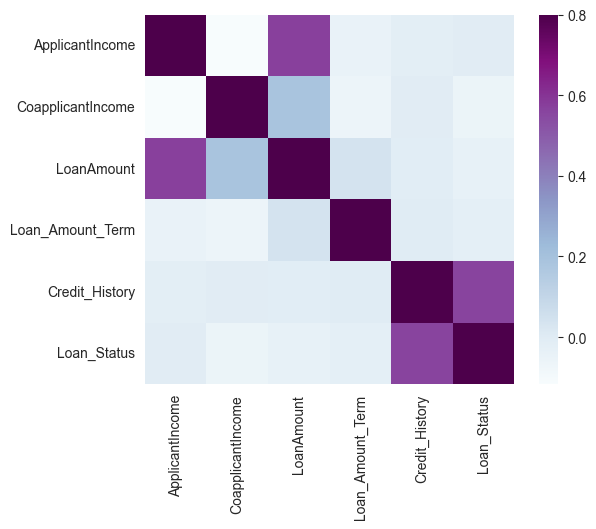

In [123]:
matrix = train.corr(numeric_only=True)
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")
plt.show()

### Preprocessing Data

In [125]:
# all missing values count
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [273]:
# replaces instances without Gender with 'Male' as it's majority
train['Gender'] = train['Gender'].fillna('Male')
test['Gender'] = test['Gender'].fillna('Male')

# replaces instances without Married with 'Yes' as it's majority
train['Married'] = train['Married'].fillna('Yes')
test['Married'] = test['Married'].fillna('Yes')

# replaces instances without Dependents with 0 as it's majority
train['Dependents'] = train['Dependents'].fillna('0')
test['Dependents'] = test['Dependents'].fillna('0')

# replaces instances without Self_Employed with 'No' as it's majority
train['Self_Employed'] = train['Self_Employed'].fillna('No')
test['Self_Employed'] = test['Self_Employed'].fillna('No')

# replaces missing Loan_Amount with median
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].median())
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].median())

# replaces missing Loan_Amount_Term with mode
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(360)
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(360)

# replaces instances with mode
train['Credit_History'] = train['Credit_History'].fillna(1)
test['Credit_History'] = test['Credit_History'].fillna(1)

In [274]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

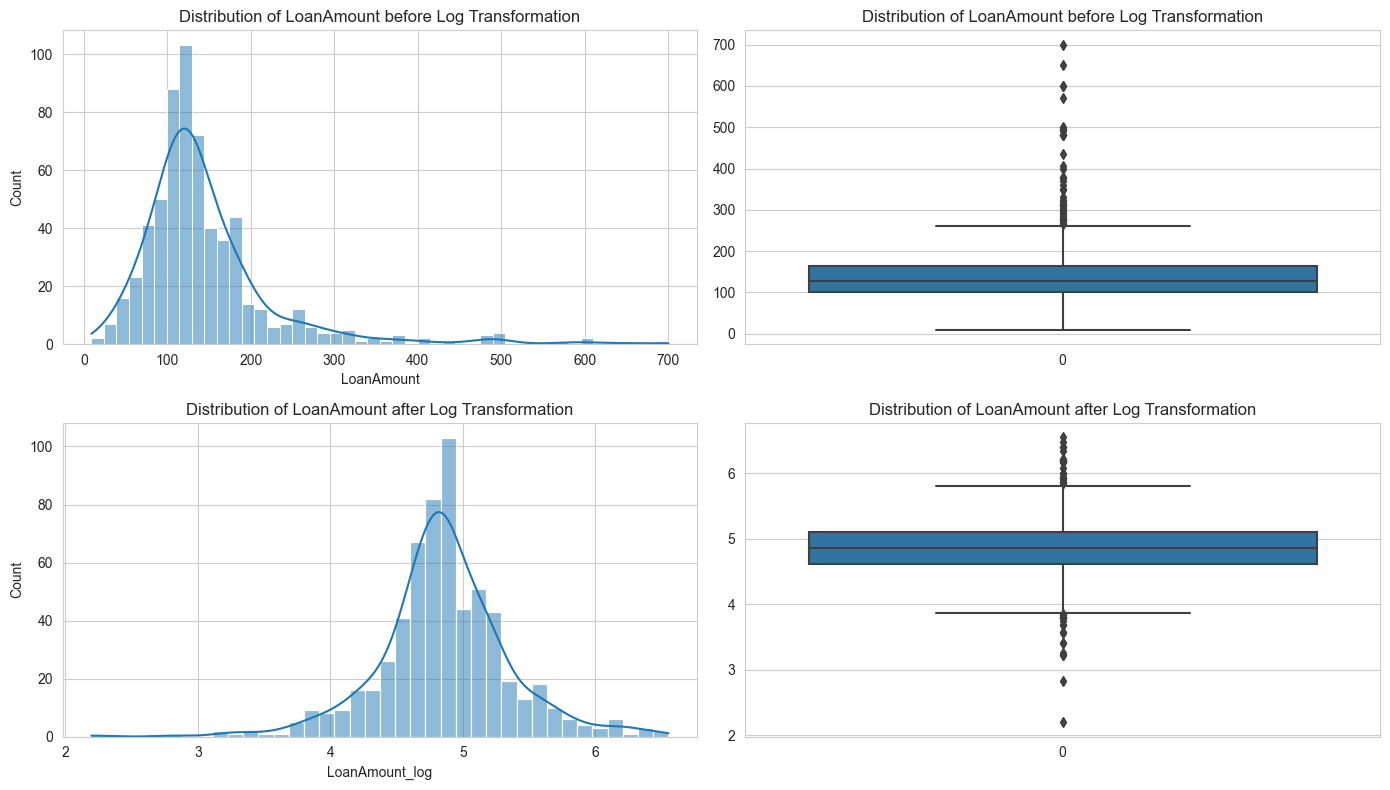

In [146]:
plt.figure(figsize=(14, 8), layout='tight')

plt.subplot(221)
plt.title("Distribution of LoanAmount before Log Transformation")
sns.histplot(train['LoanAmount'], kde=True)

plt.subplot(222)
plt.title("Distribution of LoanAmount before Log Transformation")
sns.boxplot(train['LoanAmount'])

plt.subplot(223)
plt.title("Distribution of LoanAmount after Log Transformation")
sns.histplot(train['LoanAmount_log'], kde=True)

plt.subplot(224)
plt.title("Distribution of LoanAmount after Log Transformation")
sns.boxplot(train['LoanAmount_log'])
plt.show()

### Some feature engineering

In [275]:
# total income by summing up the income of applicant and co-applicant
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

# loan amount required to pay every month
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']

# balance income after paying EMI
train['Balance_Income'] = train['ApplicantIncome'] - train['EMI']
test['Balance_Income'] = test['ApplicantIncome'] - test['EMI']

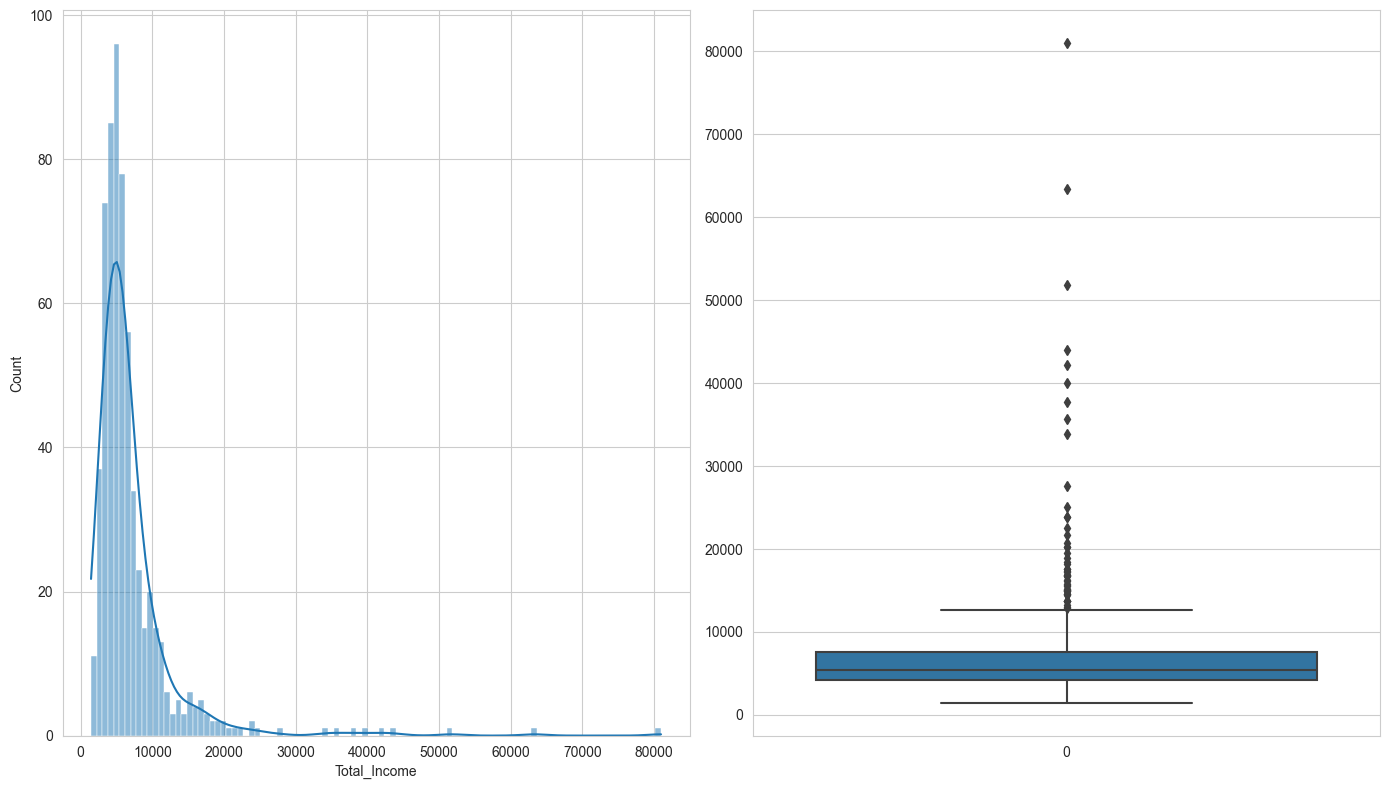

In [184]:
plt.figure(figsize=(14, 8), layout='tight')

plt.subplot(121)
sns.histplot(train['Total_Income'], kde=True)

plt.subplot(122)
sns.boxplot(train['Total_Income'])

plt.show()

In [276]:
# remove noises from the dataset
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

### Building the model

In [272]:
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

In [148]:
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']

In [149]:
# basically one hot encoding
X = pd.get_dummies(X)
test = pd.get_dummies(test)

In [160]:
# standardized data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [165]:
lg_model = LogisticRegression(random_state=42)
lg_model.fit(X_train, y_train)
lg_model.score(X_test, y_test)

0.7886178861788617

In [166]:
y_pred = lg_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7886178861788617

In [212]:
# {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'} 
lg_model = LogisticRegression(C=0.1, penalty='l2', solver='newton-cg')
lg_model.fit(X_train, y_train)
lg_model.score(X_test, y_test)

0.7886178861788617

In [215]:
y_pred = lg_model.predict(X_test)

In [219]:
cm = confusion_matrix(y_pred, y_test)
true_positive, false_positive, false_negative, true_positive = confusion_matrix(y_pred, y_test).ravel()

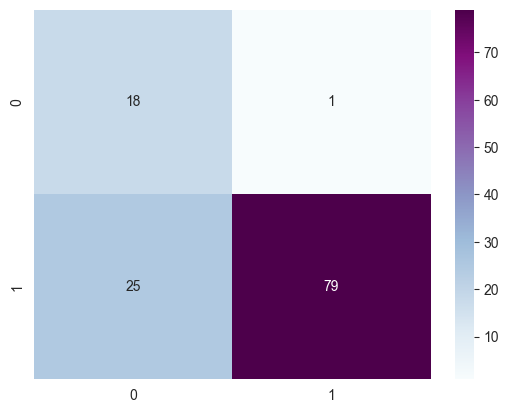

In [226]:
sns.heatmap(cm, cmap="BuPu", annot=True, fmt="")
plt.show()

In [248]:
X_train = pd.get_dummies(X)
y_train = train['Loan_Status']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

lg_model = LogisticRegression(C=0.1, penalty='l2', solver='newton-cg')
lg_model.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='newton-cg')

### Model building with DT, RandomForest and XGBoost

In [266]:
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']

X = pd.get_dummies(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [195]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [196]:
dt_model.score(X_test, y_test)

0.6747967479674797

In [198]:
rand_model = RandomForestClassifier(n_estimators=100, random_state=42)
rand_model.fit(X_train, y_train)
rand_model.score(X_test, y_test)

0.7804878048780488

In [203]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [204]:
xgb_model.score(X_test, y_test)

0.7723577235772358

### SVM Model (Hyperparameter tuning)

In [287]:
scaler = StandardScaler()
X_train = train.drop('Loan_Status', axis=1)
X_train = pd.get_dummies(X_train)
X_train = scaler.fit_transform(X_train)

y_train = train['Loan_Status']

In [278]:
X_test = pd.get_dummies(test)

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

In [288]:
# {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'sigmoid'}
svm_model = SVC(C=0.1, degree=2, gamma='scale', kernel='sigmoid', random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [295]:
submission = pd.DataFrame({
    'Loan_ID': test2['Loan_ID'],
    'Loan_Status': y_pred
})

In [296]:
submission['Loan_Status'] = submission['Loan_Status'].replace({ 1: 'Y', 0: 'N' })

In [299]:
submission.to_csv("prediction_svm.csv", index=False)

### Hyperparameter tuning for LG Model

In [169]:
def grid_search(model, param_grid):
    # fold the data into how many split
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
    grid_result = grid_search.fit(X_train, y_train)
    print("Best: %f using %s " % (grid_result.best_score_, grid_result.best_params_))
    
    # summarize result
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f), with %r" % (mean, stdev, param))

In [172]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1, 0.1, 0.01]
grid_search(lg_model, dict(solver=solvers, penalty=penalty, C=c_values))

Best: 0.816694 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'} 
0.815320 (0.035259), with {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.815320 (0.035259), with {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.815320 (0.035259), with {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.815320 (0.035259), with {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.815320 (0.035259), with {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.815320 (0.035259), with {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.815320 (0.035259), with {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.815320 (0.035259), with {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.815320 (0.035259), with {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
0.816694 (0.035162), with {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.816694 (0.035162), with {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.816000 (0.035074), with {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.807184 (0.034234), with {'

In [199]:
n_estimators = [10, 100, 1000]
criterion = ['gini', 'entropy']
max_features = ['sqrt', 'log2']

rand_model = RandomForestClassifier(random_state=42)
grid_search(rand_model, dict(n_estimators=n_estimators, criterion=criterion, max_features=max_features))

Best: 0.797034 using {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 1000} 
0.767088 (0.051189), with {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 10}
0.794980 (0.041604), with {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}
0.795646 (0.042784), with {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 1000}
0.767088 (0.051189), with {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 10}
0.794980 (0.041604), with {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100}
0.795646 (0.042784), with {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 1000}
0.765755 (0.050845), with {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 10}
0.794299 (0.044952), with {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}
0.797034 (0.040340), with {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 1000}
0.765755 (0.050845), with {'criterion': 'entropy', 'max_featu

In [209]:
n_estimators = [10, 100, 1000]
learning_rate = [10e-4, 10e-3, 10e-2, 10e-1, 10e0]

xgb_model = XGBClassifier()
grid_search(xgb_model, dict(n_estimators=n_estimators, learning_rate=learning_rate))

Best: 0.796966 using {'learning_rate': 0.1, 'n_estimators': 10} 
0.783374 (0.041695), with {'learning_rate': 0.001, 'n_estimators': 10}
0.790177 (0.041522), with {'learning_rate': 0.001, 'n_estimators': 100}
0.795605 (0.034476), with {'learning_rate': 0.001, 'n_estimators': 1000}
0.789497 (0.041922), with {'learning_rate': 0.01, 'n_estimators': 10}
0.794925 (0.033854), with {'learning_rate': 0.01, 'n_estimators': 100}
0.786816 (0.042882), with {'learning_rate': 0.01, 'n_estimators': 1000}
0.796966 (0.036284), with {'learning_rate': 0.1, 'n_estimators': 10}
0.788190 (0.042706), with {'learning_rate': 0.1, 'n_estimators': 100}
0.763701 (0.047016), with {'learning_rate': 0.1, 'n_estimators': 1000}
0.762408 (0.050664), with {'learning_rate': 1.0, 'n_estimators': 10}
0.765755 (0.050628), with {'learning_rate': 1.0, 'n_estimators': 100}
0.758313 (0.057017), with {'learning_rate': 1.0, 'n_estimators': 1000}
0.518490 (0.202101), with {'learning_rate': 10.0, 'n_estimators': 10}
0.518490 (0.2021

In [263]:
C = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [2, 3, 4, 5]
gamma = ['scale', 'auto']

svm_model = SVC(random_state=42)
grid_search(svm_model, dict(C=C, kernel=kernel, degree=degree, gamma=gamma))

Best: 0.809387 using {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'sigmoid'} 
0.809378 (0.042031), with {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
0.685678 (0.006542), with {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
0.741583 (0.024022), with {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
0.809387 (0.041972), with {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.809378 (0.042031), with {'C': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
0.685678 (0.006542), with {'C': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
0.742676 (0.024193), with {'C': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
0.809387 (0.041972), with {'C': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.809378 (0.042031), with {'C': 0.1, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
0.735034 (0.029017), with {'C': 0.1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
0.741583 (0.024022), with {'C': 0.1, 'degree': 3,

### Building the model (without following tutorial)

In [7]:
# normalization
train['LoanAmount'] = train['LoanAmount'].apply(lambda x: (x - min(train['LoanAmount'])) / (max(train['LoanAmount']) / min(train['LoanAmount'])))

In [5]:
def one_hot_encode(X):
    encoder = OneHotEncoder(handle_unknown='ignore')
    result = encoder.fit_transform(X)
    features_name = encoder.get_feature_names_out()
    
    return features_name, result.toarray()

In [14]:
# one-hot encoding for categorical variables
new_gender_features, gender_array = one_hot_encode(train[['Gender']])
train[new_gender_features] = gender_array

new_married_features, married_array = one_hot_encode(train[['Married']])
train[new_married_features] = married_array

new_dependents_features, dependents_array = one_hot_encode(train[['Dependents']])
train[new_dependents_features] = dependents_array

new_education_features, education_array = one_hot_encode(train[['Education']])
train[new_education_features] = education_array

new_employed_features, employed_array = one_hot_encode(train[['Self_Employed']])
train[new_employed_features] = employed_array

new_property_features, property_array = one_hot_encode(train[['Property_Area']])
train[new_property_features] = property_array

# new_loan_status_features, loan_status_array = one_hot_encode(train[['Loan_Status']])
# train[new_loan_status_features] = loan_status_array

train['Loan_Status'] = train['Loan_Status'].replace({ 'Y': 1, 'N': 0 })

In [15]:
# drops original columns

train = train.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], axis=1)

In [4]:
# integer-encoding for categorical variables
train['Gender'] = train['Gender'].replace({ 'Male': 0, 'Female': 1 })
train['Married'] = train['Married'].replace({ 'Yes': 1, 'No': 2 })
train['Dependents'] = train['Dependents'].replace({ '0': 0, '1': 1, '2': 2, '3+': 3 })
train['Education'] = train['Education'].replace({ 'Graduate': 1, 'Not Graduate': 0 })
train['Self_Employed'] = train['Self_Employed'].replace({ 'No': 0, 'Yes': 1 })
train['Property_Area'] = train['Property_Area'].replace({ 'Rural': 0, 'Semiurban': 1, 'Urban': 2 })
train['Loan_Status'] = train['Loan_Status'].replace({ 'Y': 1, 'N': 0 })

In [17]:
X = train.drop(['Loan_ID', 'Loan_Status'], axis=1)
X = StandardScaler().fit_transform(X)

y = train['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [21]:
def grid_search(model, param_grid):
    # fold the data into how many split
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
    grid_result = grid_search.fit(X_train, y_train)
    print("Best: %f using %s " % (grid_result.best_score_, grid_result.best_params_))
    
    # summarize result
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with %r" % (mean, stdev, param))

In [22]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1, 0.1, 0.01]

lg_model = LogisticRegression(random_state=42)
grid_search(lg_model, dict(solver=solvers, penalty=penalty, C=c_values))

Best: 0.816680 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'} 
0.816680 (0.034475) with {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.816680 (0.034475) with {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.816680 (0.034475) with {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.816680 (0.034475) with {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.816680 (0.034475) with {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.816680 (0.034475) with {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.816680 (0.034475) with {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.816680 (0.034475) with {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.816680 (0.034475) with {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
0.816014 (0.034965) with {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.816014 (0.034965) with {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.816000 (0.035074) with {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.807184 (0.034234) with {'C': 0.01, 'pe

In [23]:
solvers = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ridge_model = RidgeClassifier()

grid_search(ridge_model, dict(solver=solvers, alpha=alpha))

Best: 0.816694 using {'alpha': 0.1, 'solver': 'auto'} 
0.816694 (0.035162) with {'alpha': 0.1, 'solver': 'auto'}
0.816694 (0.035162) with {'alpha': 0.1, 'solver': 'svd'}
0.816694 (0.035162) with {'alpha': 0.1, 'solver': 'cholesky'}
0.816694 (0.035162) with {'alpha': 0.1, 'solver': 'lsqr'}
0.816694 (0.035162) with {'alpha': 0.1, 'solver': 'sparse_cg'}
0.816694 (0.035162) with {'alpha': 0.1, 'solver': 'sag'}
0.816694 (0.035162) with {'alpha': 0.1, 'solver': 'saga'}
nan (nan) with {'alpha': 0.1, 'solver': 'lbfgs'}
0.816694 (0.035162) with {'alpha': 0.2, 'solver': 'auto'}
0.816694 (0.035162) with {'alpha': 0.2, 'solver': 'svd'}
0.816694 (0.035162) with {'alpha': 0.2, 'solver': 'cholesky'}
0.816694 (0.035162) with {'alpha': 0.2, 'solver': 'lsqr'}
0.816694 (0.035162) with {'alpha': 0.2, 'solver': 'sparse_cg'}
0.816694 (0.035162) with {'alpha': 0.2, 'solver': 'sag'}
0.816694 (0.035162) with {'alpha': 0.2, 'solver': 'saga'}
nan (nan) with {'alpha': 0.2, 'solver': 'lbfgs'}
0.816694 (0.035162) w

C:\Users\bpvpe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bpvpe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bpvpe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py", line 1424, in fit
    super().fit(X, Y, sample_weight=sample_weight)
  File "C:\Users\bpvpe\AppData\Local\Programs\Python\Python310\

In [24]:
n_neighbors = [1, 2, 3, 4, 5, 10, 15, 20]
weights = ['uniform', 'distance']
algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']
p = [1, 2, 3]

neighbor_model = KNeighborsClassifier()

grid_search(neighbor_model, dict(n_neighbors=n_neighbors, weights=weights, algorithm=algorithms, p=p))

Best: 0.770571 using {'algorithm': 'auto', 'n_neighbors': 3, 'p': 3, 'weights': 'uniform'} 
0.710884 (0.056269) with {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.710884 (0.056269) with {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
0.700626 (0.042379) with {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
0.700626 (0.042379) with {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
0.695864 (0.043299) with {'algorithm': 'auto', 'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}
0.695864 (0.043299) with {'algorithm': 'auto', 'n_neighbors': 1, 'p': 3, 'weights': 'distance'}
0.647728 (0.067666) with {'algorithm': 'auto', 'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.710884 (0.056269) with {'algorithm': 'auto', 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.649075 (0.066966) with {'algorithm': 'auto', 'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
0.700626 (0.042379) with {'algorithm': 'auto', 'n

In [25]:
C = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['poly', 'rbf', 'sigmoid']
degree = [1, 2, 3, 4]
gamma = ['scale', 'auto']

svm_model = SVC(random_state=42)

grid_search(svm_model, dict(C=C, kernel=kernel, degree=degree, gamma=gamma))

Best: 0.814653 using {'C': 0.1, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'} 
0.814653 (0.033713) with {'C': 0.1, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}
0.699932 (0.010292) with {'C': 0.1, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.814653 (0.033713) with {'C': 0.1, 'degree': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.814653 (0.033713) with {'C': 0.1, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}
0.700612 (0.011784) with {'C': 0.1, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.814653 (0.033713) with {'C': 0.1, 'degree': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.697891 (0.009210) with {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
0.699932 (0.010292) with {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
0.814653 (0.033713) with {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.697891 (0.009210) with {'C': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
0.700612 (0.011784) with {'C': 0.1, 'degree': 2, 'gamma': 'auto', 

In [26]:
n_estimators = [10, 100, 1000]

bagged_dt = BaggingClassifier(random_state=42)

grid_search(bagged_dt, dict(n_estimators=n_estimators))

Best: 0.787565 using {'n_estimators': 1000} 
0.762354 (0.050123) with {'n_estimators': 10}
0.784150 (0.047000) with {'n_estimators': 100}
0.787565 (0.047751) with {'n_estimators': 1000}


In [27]:
n_estimators = [10, 100, 1000]
criterion = ['gini', 'entropy', 'log_loss']

random_forest_model = RandomForestClassifier(random_state=42)

grid_search(random_forest_model, dict(n_estimators=n_estimators, criterion=criterion))

Best: 0.799714 using {'criterion': 'entropy', 'n_estimators': 1000} 
0.770558 (0.055270) with {'criterion': 'gini', 'n_estimators': 10}
0.792884 (0.048901) with {'criterion': 'gini', 'n_estimators': 100}
0.792231 (0.052713) with {'criterion': 'gini', 'n_estimators': 1000}
0.770544 (0.054005) with {'criterion': 'entropy', 'n_estimators': 10}
0.798327 (0.044251) with {'criterion': 'entropy', 'n_estimators': 100}
0.799714 (0.050964) with {'criterion': 'entropy', 'n_estimators': 1000}
0.770544 (0.054005) with {'criterion': 'log_loss', 'n_estimators': 10}
0.798327 (0.044251) with {'criterion': 'log_loss', 'n_estimators': 100}
0.799714 (0.050964) with {'criterion': 'log_loss', 'n_estimators': 1000}


In [16]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [17]:
dt_model.score(X_test, y_test)

0.6829268292682927

In [18]:
nb_model.score(X_test, y_test)

0.7804878048780488

### Conclusion

1. Standardization of data using `sklearn.preprocessing.scale` method significantly increases the performance of the model but not necessarily the accuracy.
2. When doing EDA, can separate variable into types of variables first, then do EDA based on the types of variables
3. Facet grid (subplot) are advised to use for comparison between charts of the same type of variables.